# Métodos Numéricos: Algoritmo de Newton-Raphson

## Se utiliza cuando no tenemos solucion cerrada para un sistema de ecuaciones cualquiera

En este módulo haremos una introducción a los llamados $\textbf{Métodos Numéricos}$.
Estos son procedimientos que utilizamos para poder resolver sistemas de ecuaciones.

Aunque podemos utilizarlo para cualquier sistema de ecuaciones, se recomienda utilizarlos cuando no hay una solución de forma cerrada ($\textit{closed form solution}$).

Una solución de forma cerrada es una solución que podemos deducir por métodos algebraicos tradicionales. 

Por ejemplo, dada la siguiente ecuación:
$$\lambda^2-\phi_1\lambda-\phi_2=0$$

Sabemos que la solución de forma cerrada de las raíces es la siguiente:
$$\lambda_{1,2}=\frac{\phi_1\pm\sqrt{\phi_1^2+4\phi_2}}{2}$$

No obstante, en esta clase introductoria utilizaremos el método de Newton-Raphson para funciones que $\textbf{sí}$ tienen una solución de forma cerrada. El motivo de esta elección es que sea fácil para el alumno entender intuitivamente el método y  compararlo con las otras formas de resolución que ya conoce.

In [80]:
import os
from IPython import display

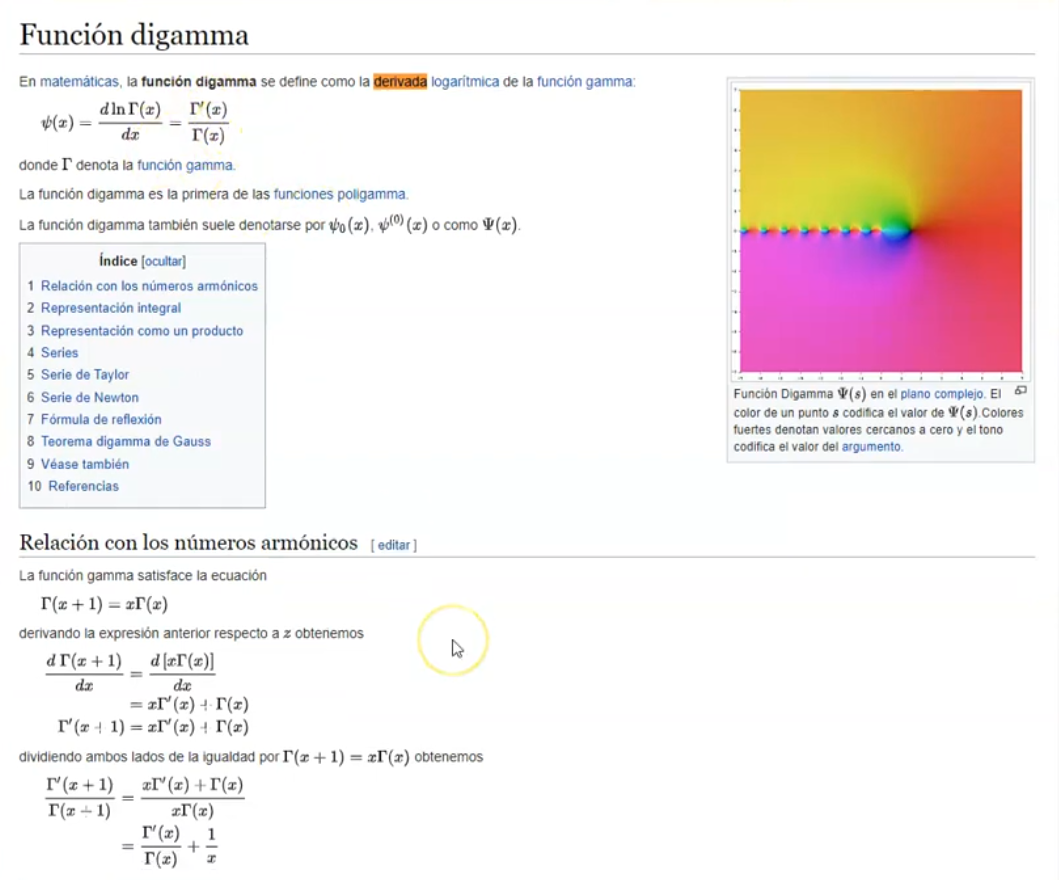

In [81]:
display.Image("Clase10_topi.png")

En esa función podemos observar que no podemos resolverva (hallar los puntos que maximizan la ecuacion) siguiendo el metodo cuantitativo tradicional.

En ese tipo de funciones sera necesario aplicar Newton-Rapson. Este es un metodo numerico (no es un metodo analitico), los cuales son una aproximacion a lo que queremos encontrar.

# En este caso, usaremos una ecuacion que si puede ser resuelta de manera analitica, solamente para poder ilustrar como funciona el algoritmo

#### Importamos librerías
Para este módulo solo necesitaremos Numpy y Matplotlib.

In [82]:
import numpy as np
import matplotlib.pyplot as plt

### Newton Raphson para una ecuación

Comenzaremos utilizando el método de Newton Raphson para hallar las raíces inversas de un AR(2). 
$$ (1-\phi_1L-\phi_2L^2)y_t=\epsilon_t $$
Donde el polinomio de rezagos del proceso es el siguiente:
$$ \Phi(L)=1-\phi_1L-\phi_2L^2 $$
Y la ecuación característica esta definida por:
$$ \lambda^2-\phi_1\lambda-\phi_2 $$

A esta última expresión nos referiremos como nuestra función $f(\lambda)$:
$$ f(\lambda)=\lambda^2-\phi_1\lambda-\phi_2 $$
Hallar las raíces de la ecuación significa hallar valores de $\lambda$ tal que se cumpla:
$$ f(\lambda)=0 $$


Asumiremos los valores:
$$ \phi_1=1.1 $$
$$ \phi_2=-0.18$$

In [83]:
phi1 = 1.1
phi2 = -0.18

###### Vamos a hacer un gráfico para mostrar cuál es la función cuya raíz queremos hallar y tener una idea de cómo vamos a operar.

# Esta es la función cuyas raíces queremos hallar

In [84]:
def f(lamb):
    return -(lamb**2-phi1*lamb-phi2);

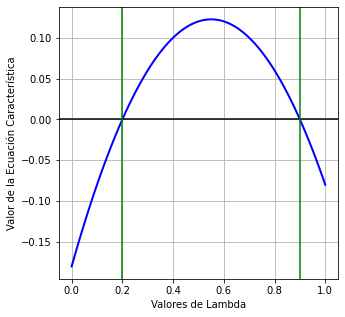

In [85]:
def plot(inicial=False,inicialv=float):
    Rango = np.linspace(0., 1, 101)
    Valores = f(Rango)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.plot(Rango,Valores, color='blue',lw=2)
    plt.xlabel("Valores de Lambda")
    plt.ylabel("Valor de la Ecuación Característica")
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0.2, ls='-',color='g')
    ax.axvline(x=0.9, ls='-',color='g')
    if inicial==True:
        ax.axvline(x=inicialv, ls='-',color='r')
    plt.show()
plot()

Podemos observar que esta función tiene 2 raíces: 0.2 y 0.9.

A continuación veremos cómo opera el algoritmo, cuáles son sus bondades y limitaciones.

###### La forma general del algoritmo (Version no Matricial):

La forma general del algoritmo es la siguiente:
$$
x_{n+1} = x_n – \frac{f(x_n)}{f'(x_n)}
$$
Donde $f(x_n)$ es la función cuyas raíces hemos de hallar, $f'(x_n)$ es su primera derivada, $x_n$ son valores que iremos probando iterativamente hasta hallar alguno que cumpla con la condición:
$$
f(x_n)=0
$$
Lo que en términos computacionales se suele traducir como
$$
f(x_n)<\epsilon
$$
Donde $\epsilon$ es un número "pequeño".

###### Adaptamos la forma general del algoritmo a este caso específico:

El algoritmo de newton-raphson utilizado para hallar los valores de lambda sería el siguiente:
$$
\lambda_{n+1} = \lambda_n – \frac{f(\lambda_n)}{f'(\lambda_n)}
$$

Como indicamos previamente, la función ,$f(\lambda)$ cuyas raíces queremos hallar, es la siguiente:
$$ f(\lambda)=\lambda^2-\phi_1\lambda-\phi_2 $$

La primera derivada, la función ,$g(\lambda)=f'(\lambda)$, es la siguiente:
$$ g(\lambda)=f'(\lambda)=2\lambda-\phi_1$$

In [118]:
def f(lamb):
    return lamb**2-phi1*lamb-phi2;   # la funcion f

In [119]:
def g(lamb):
    return 2*lamb-phi1;      # la primera derivada de la funcion f con respecto a lambda

En el siguiente bloque definiremos 2 variables auxiliares:

1. condicion: es la condicion que se debe cumplir para que el algoritmo siga iterando. Esta es definida como $f(\lambda_n)>\epsilon$. Cuando el algoritmo converja a la raíz de $f(\lambda_n)$, esta función tomará valores próximos a 0 y se dejará de cumplir la condición mencionada. Ahí el algoritmo dejará de iterar.
2. it: Cuenta el número de iteraciones que necesitamos para llegar a la raíz.
3. epsilon: es nuestro criterior de convergencia. Si le damos valores muy grandes (ej: $0.1$) las raíces que hallemos estarán más lejos de la raíz verdadera. No obstante, si le damos valores muy pequeños (ej: $e^{-1000}$), es probable que nuestro algoritmo nunca converja.

En este caso adoptaremos el siguiente valor:

$$
\epsilon = e^{-10}
$$


#### OJO: Los metodos numericos nuna dan raices que llevn a que la funcion sea exactamente 0, lo usual es que de numero aproximados de manera cercana.

In [120]:
condicion = False
it = 0    # Cuenta el número de iteraciones que necesitamos para llegar a la raíz.
epsilon = 1e-10

El último requisito para comenzar la iteración es un valor inicial de $\lambda$. En este caso comenzaremos la iteración con:
$$
\lambda=0
$$

Nosotros para dar un valor inicial ya podemos darnos una idea viendo un grafico, ello para asegurarnos de brindar un valor inicial que se encuentre lo mas cercano a la raiz que resuelva el problema.

In [151]:
condicion = False
it = 0    # Cuenta el número de iteraciones que necesitamos para llegar a la raíz.
epsilon = 1e-10

lamb = 1

Así luces nuestro algoritmo en pseudocódigo:

$
lamb_0 = 0 \\
it_0 = 0 \\
mientras f(\lambda_n)>\epsilon: \\
\>\>\>\>\>\>\>\> \lambda_{n+1} = \lambda_n – \frac{f(\lambda_n)}{f'(\lambda_n)} \\
\>\>\>\>\>\>\>\> it_{n+1} = it_n+1 \\
\>\>\>\>\>\>\>\> \\
\>\>\>\>\>\>\>\> Si f(\lambda_{n+1})<\epsilon: \\
\>\>\>\>\>\>\>\>\>\>\>\>\>\> Dejar\;de\:iterar
$

### Esta opcion es para optimizar(llegar a la meta):

In [147]:
while condicion == False:
    lamb = lamb - (g(lamb)**(-1))*f(lamb)   # el valor de lamb se actualizara por cada iteracion, haciendo el papel de lamb_n+1
    condicion = (abs(f(lamb))<epsilon)
    it = it+1

### Si lo que queremos es minimizar, entonces lo que debemos hacer es poner ...... un signo negativo en la función f():

Mostramos el valor que optuvimos para $\lambda$. Este sería nuestro $\hat{\lambda}_{NR}$ estimado por el método de Newton Raphson. Podemos ver que esta es una aproximación a su verdadera raíz (0.2)

In [148]:
lamb

0.9111111111111112

In [150]:
it

1

Solo se necesitaron 4 iteraciones para llegar a la respuesta.

###### Nota sobre valores iniciales

No es arbitrario que hallamos llegado a este valor, pues es la raíz más cercana al valor inicial que nosotros dimos:
$$ \lambda_0 = 0 $$

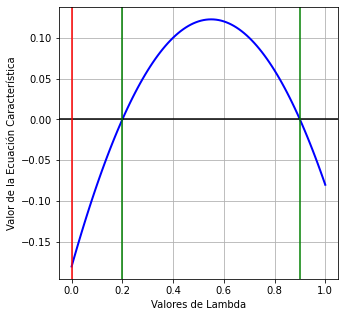

In [105]:
plot(inicial=True,inicialv=0)

Si cambiamos el valor inicial por otro más cercano a la segunda raíz, hallaremos una aproximación a la segunda raíz (0.9):
$$ \lambda_0 = 1 $$

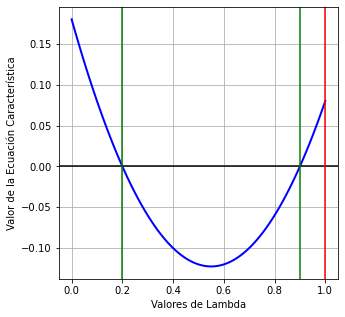

In [246]:
plot(inicial=True,inicialv=1)

In [23]:
lamb = 0
condicion = False
it = 0

In [24]:
while condicion == False:
    lamb = lamb - (g(lamb)**(-1))*f(lamb)
    condicion = (abs(f(lamb))<epsilon)
    it = it+1

Vemos que en este caos llegamos a una aproximación de la segunda raíz (0.9)

In [27]:
lamb

0.19999999997524298

In [28]:
it

4

###### Conclusión: Las raíces que halle nuestro algoritmo de Newton-Raphson están fuertemente condicionadas por el valor inicial que nosotros demos. Por ese motivo es recomendable probar varios valores iniciales y/o hacer evaluaciones "educadas" de cuál podría ser el rango de nuestras raíces.

### Newton Raphson para un sistema de ecuaciones

Utilizaremos el método de Newton Raphson para hallar las los coeficientes de una estimación por mínimos cuadrados ordinarios: 
$$ Y_i = \beta_0 + \beta_1X_i + e_i $$
Donde las condiciones de primer orden son::
$$ f_1(\beta_0,\beta_1) = \frac{\delta F(\beta_0,\beta_1)}{\delta\beta_0}=\beta_0N + \beta_1\sum_{i=1}^NX_i - \sum_{i=1}^NY_i = 0 $$
$$ f_2(\beta_0,\beta_1) = \frac{\delta F(\beta_0,\beta_1)}{\delta\beta_1}=\beta_0\sum_{i=1}^NX_i + \sum_{i=1}^NX_i^2 - \sum_{i=1}^NX_iY_i = 0$$
Para: 
$$
F(\beta_0,\beta_1) = \sum_{i=1}^N(Y - \beta_0 - \beta_1X_i)
$$

Las 2 ecuaciones $f_1(\beta_0,\beta_1)=0$ y $f_2(\beta_0,\beta_1)=0$ pueden ser expresadas matricialmente de la forma:

$$
\textbf{f}(\beta_0,\beta_1)=\textbf{0}
$$

$$
\begin{pmatrix}
f_1(\beta_0,\beta_1)\\
f_2(\beta_0,\beta_1)
\end{pmatrix}
=\begin{pmatrix}
0\\
0
\end{pmatrix}
$$ 
Con la siguiente matriz jacobiana:
$$
J(\beta_0,\beta_1) = 
\begin{pmatrix}
\frac{\delta f_1(\beta_0,\beta_1)}{\delta\beta_0} & \frac{\delta f_1(\beta_0,\beta_1)}{\delta\beta_1} \\
\frac{\delta f_2(\beta_0,\beta_1)}{\delta\beta_0} & \frac{\delta f_2(\beta_0,\beta_1)}{\delta\beta_1}
\end{pmatrix}
=
\begin{pmatrix}
N & \sum_{i=1}^NX_i \\
\sum_{i=1}^NX_i & \sum_{i=1}^NX_i^2
\end{pmatrix}
$$

Notar que en este caso específico la matriz jacobiana no depende de las raíces que queremos hallar ($\beta_0$ y $\beta_1$). No obstante, esto es específico a este caso y no una generalidad.

###### La forma general del algoritmo

La forma general del algoritmo es la siguiente:
$$
\textbf{x}_{n+1} = \textbf{x}_n – J(\textbf{x}_n)^{-1}\textbf{f}(\textbf{x}_n)
$$
Donde $\textbf{x}_n$ es el vector con las funciones cuyas raíces hemos de hallar, $J(x_n)$ es la matriz jacobiana, $\textbf{x}_n$ es un vector con las raíces hasta hallar alguno que cumpla con la condición:
$$
\textbf{f}(\textbf{x}_n) = \textbf{0}
$$
Lo que en términos computacionales se suele traducir como
$$
\textbf{f}(\textbf{x}_n) < \epsilon
$$
Donde $\epsilon$ es un número "pequeño". Y lo que quiere decir es que .. el primer elemento que cumpla la condicion será cuando el algoritmo se detendrá

El algoritmo de newton-raphson utilizado para hallar los valores de lambda sería el siguiente:
$$
\beta_{n+1} = \beta_{n} – J(\beta_n)^{-1}\textbf{f}(\beta_n)
$$

Como indicamos previamente, las funciones ,$\textbf{f}(\beta_n)$ cuyas raíces queremos hallar, son la siguiente:
$$ f_1(\beta_0,\beta_1) = \beta_0N + \beta_1\sum_{i=1}^NX_i - \sum_{i=1}^NY_i $$
$$ f_2(\beta_0,\beta_1) = \beta_0\sum_{i=1}^NX_i + \sum_{i=1}^NX_i^2 - \sum_{i=1}^NX_iY_i $$


La matriz Jacobiana, la función ,$g(\lambda)=f'(\lambda)$ , es la siguiente:
$$
J(\beta_0,\beta_1) =
\begin{pmatrix}
N & \sum_{i=1}^NX_i \\
\sum_{i=1}^NX_i & \sum_{i=1}^NX_i^2
\end{pmatrix}
$$


En el siguiente bloque creamos la data sintética para poder estimar el modelo:

$$ Y_i = \beta_0 + \beta_1X_i + e_i = 10 + 3.2X_i + e_i$$

Donde $e\sim N(0,1.5^2)$

In [251]:
N = 1000
mu_x = 5         # media de la variable X 
sigma_x = 1.2    # desviacion estandar de la variable X
sigma_e = 1.5   # desviacion estandar del error

np.random.seed(1)
X = mu_x + sigma_x*np.random.randn(N,1)  # la variable X sera igual a su media mas la desv.estandar*el errror
e = sigma_e*np.random.randn(N,1)

In [252]:
X.shape,e.shape

((1000, 1), (1000, 1))

In [253]:
b0 = 10
b1 = 3.2
Y = b0 + b1*X + e

Los verdaderos parámetros son $\beta_0=10$ y $\beta_1=3.2$. Tenemos $N=1000$ observaciones.

###### Definimos las sumatorias incluidas en nuestro vector de funciones $\textbf{f}(\beta_0,\beta_1)$ y en la matriz Jacoabiana 

In [254]:
SUM1 = float(sum(Y))
SUM1

26190.028073544763

In [255]:
SUM2 = float(sum(X))
SUM2

5046.574971391517

In [256]:
SUM3 = float(sum(X**2))
SUM3

26853.730461415962

In [257]:
SUM4 = float(sum(X*Y))
SUM4

136644.291504838

###### Definimos las funciones de nuestro vector $\textbf{f}(\beta_0,\beta_1)$

In [258]:
def f1(beta):
    return beta[0]*N + beta[1]*SUM2 - SUM1;

In [259]:
def f2(beta):
    return beta[0]*SUM2 + beta[1]*SUM3 - SUM4;

###### Definimos la matriz Jacobiana $J(\beta_0,\beta_1)$

In [260]:
Jacobiana = np.asarray([N,SUM2,SUM2,2*SUM3]).reshape([2,2])
Jacobiana

array([[ 1000.        ,  5046.57497139],
       [ 5046.57497139, 53707.46092283]])

El último requisito para comenzar la iteración es un valor inicial de $\beta$. En este caso comenzaremos la iteración con:
$$
\begin{pmatrix}
\beta_0\\
\beta_1
\end{pmatrix}
=\begin{pmatrix}
0\\
0
\end{pmatrix}
$$ 


In [261]:
beta = np.asarray([0,0]).reshape([2,1])
beta

array([[0],
       [0]])

In [262]:
condicion = False
it = 0
epsilon = 1e-100  # lo hemos puesto mas cercano a 0, de esta manera estamos siendo mas exigentes.

Así luces nuestro algoritmo en pseudocódigo:

$
$$
\beta_0 = \textbf{0}\\
it_0 = 0 \\
mientras \textbf{f}(\beta_n)>\epsilon: \\
\>\>\>\>\>\>\>\> \beta_{n+1} = \beta_n – J(\beta)^{-1}\textbf{f}(\beta_n) \\
\>\>\>\>\>\>\>\> it_{n+1} = it_n+1 \\
\>\>\>\>\>\>\>\> \\
\>\>\>\>\>\>\>\> Si\:\textbf{f}(\beta_n)<\epsilon: \\
\>\>\>\>\>\>\>\>\>\>\>\>\>\> Dejar\;de\:iterar
$

In [263]:
def f1(beta):
    return beta[0]*N + beta[1]*SUM2 - SUM1;
def f2(beta):
    return beta[0]*SUM2 + beta[1]*SUM3 - SUM4;

In [264]:
condicion = False
it = 0
epsilon = 1e-100  # lo hemos puesto mas cercano a 0, de esta manera estamos siendo mas exigentes.

while condicion == False:
    F = np.asarray([f1(beta),f2(beta)]).reshape([2,1])
    beta = beta - np.matmul(np.linalg.inv(Jacobiana),F)
    condicion = ( abs(F[0])<epsilon and abs(F[1])<epsilon ) # la version computacional de decir la condicion
    it = it+1

Después de 667 iteraciones llegamos a los siguientes valores de $\beta$:

In [265]:
F

array([[0.],
       [0.]])

In [266]:
beta

array([[9.89621819],
       [3.22868678]])

In [267]:
it

667

###### Comparamos con los estimadores de MCO calculados por un método de "forma cerrada":
Podemos ver que son idénticos

In [273]:
aux = np.ones([N,1])
X1 = np.concatenate((aux,X),axis=1)
beta_ols = np.matmul(np.linalg.inv(np.matmul(np.transpose(X1),X1)),np.matmul(np.transpose(X1),Y))
beta_ols

array([[9.89621819],
       [3.22868678]])